# Espectroscopia Óptica

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [4]:
sns.set_theme()

In [5]:
def gaussian(x, A, m, s): return A * np.exp( (x - m)**2 / (2 * s**2) )

## Calibração com espectro de Mercúrio

### Extração dos picos

In [9]:
data = np.loadtxt('data/mercurio_1.txt').transpose()

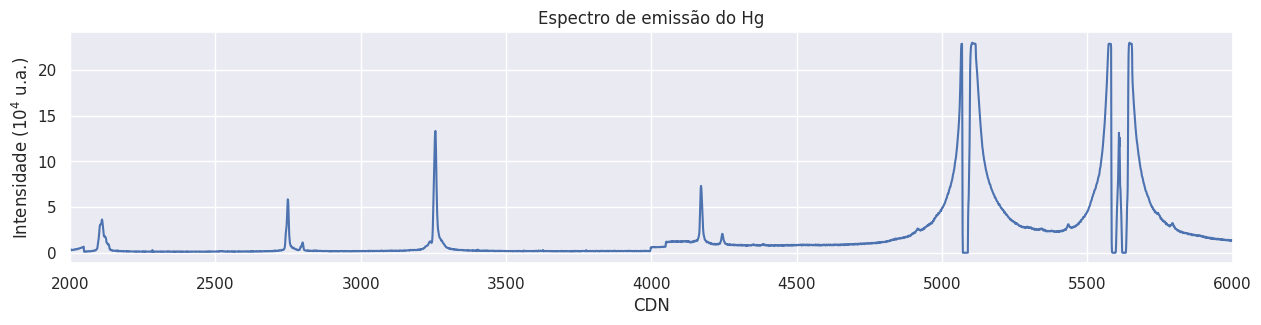

In [12]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do Hg')
sns.lineplot(x=data[0], y=data[1]/1E4)
plt.xlim(2000, 6000)
plt.xlabel('CDN')
plt.ylabel('Intensidade ($10^4$ u.a.)')
plt.savefig('plots/hg_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
peaks = find_peaks(data[1], height=5E3, prominence=2000)[0]

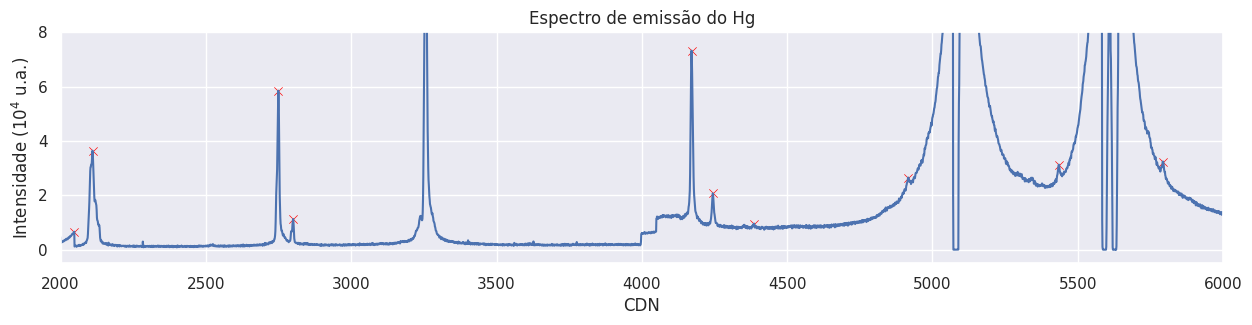

In [16]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do Hg')
sns.lineplot(x=data[0], y=data[1]/1E4)
sns.scatterplot(x=data[0][peaks], y=data[1][peaks]/1E4, color='red', marker='x')
plt.xlim(2000, 6000)
plt.ylim(-0.5, 8)
plt.xlabel('CDN')
plt.ylabel('Intensidade ($10^4$ u.a.)')
plt.show()

### Análise dos picos

In [20]:
peaks = np.loadtxt('data/picos_mercurio_1.txt').transpose()

In [21]:
popt, pcov = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=peaks[0],
	ydata=peaks[1]
)

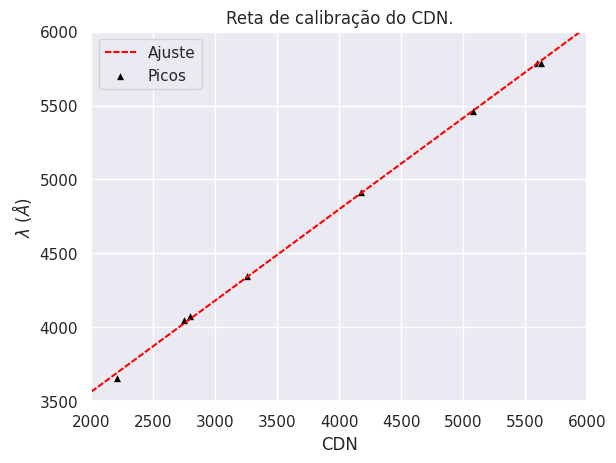

In [22]:
plt.title('Reta de calibração do CDN.')

x = np.linspace(2000, 6000, 10)

sns.lineplot(x=x, y=popt[0]*x+popt[1], color='red', dashes=(3,1), label='Ajuste')
sns.scatterplot(x=peaks[0], y=peaks[1], label='Picos', color='black', marker='^')

plt.xlim(2000, 6000)
plt.ylim(3500, 6000)
plt.xlabel('CDN')
plt.ylabel('$\\lambda$ ($\\AA$)')
plt.show()

In [23]:
popt

array([6.17502436e-01, 2.32978979e+03])

## Análise do espectro do Hidrogênio

In [37]:
data = np.loadtxt('data/hidrogenio.txt').transpose()

In [96]:
peaks = find_peaks(data[1], height=0.1E3, prominence=6000)[0]
len(peaks)

8

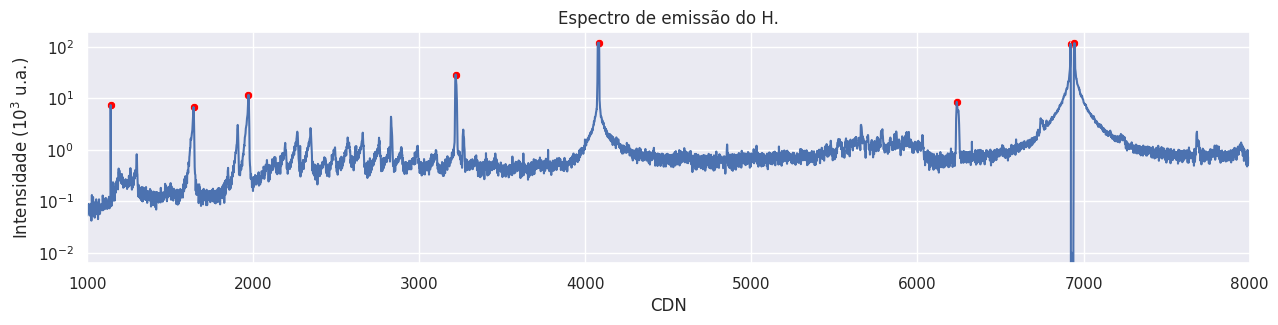

In [97]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do H.')

sns.lineplot(x=data[0], y=data[1]/1E3)
sns.scatterplot(x= data[0][peaks], y=data[1][peaks]/1E3, color='red', marker='o')

plt.yscale('log')
plt.xlim(1000, 8000)
plt.xlabel('CDN')
plt.ylabel('Intensidade ($10^3$ u.a.)')
plt.show()

In [98]:
lines = data[0][peaks]
hydro_wl = popt[0] * lines + popt[1]

In [100]:
wls = hydro_wl[-6:-1]
wls = np.delete(wls, obj=4)

xdata = 1 / np.array([ 7, 5, 4, 3 ])**2
ydata = 1 / wls

In [101]:
fit = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=xdata,
	ydata=ydata
)

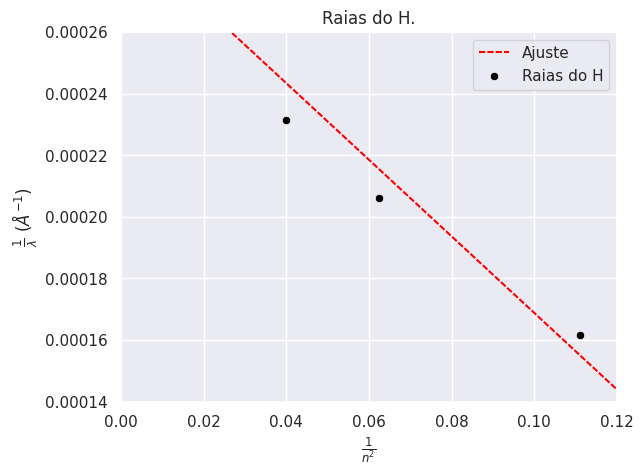

In [102]:
plt.title('Raias do H.')

x = np.linspace(0, 0.12, 10)

sns.lineplot(x=x, y=fit[0][0]*x+fit[0][1], dashes=(3,1), color='red', label='Ajuste')
sns.scatterplot(x=xdata, y=ydata, label='Raias do H', color='black')

plt.xlim(0, 0.12)
plt.ylim(14E-5, 26E-5)
plt.xlabel('$\\frac{1}{n^2}$')
plt.ylabel('$\\frac{1}{\\lambda}$ ($\\AA^{-1}$)')

plt.savefig('plots/h_emission.png', dpi=300, bbox_inches='tight')
plt.show()

In [172]:
fit

(array([-0.00093676,  0.00026598]),
 array([[ 1.55752449e-09, -9.11226884e-11],
        [-9.11226884e-11,  7.11337878e-12]]))